# Introduction:
Trade-off: a balance achieved between two desirable but incompatible features; a compromise.
The bias-variance trade-off is one of the most important aspects of error handling in supervised learning.

For example, if data of 
the bowling line and lengths of a cricket bowler in his career were analyzed.
The bowler is said to be highly biased if he bowls mostly on the same line and length like short balls, Yorkers more frequently.
The bowler with high variance is someone who tries different line and lengths i.e producing much more
Variations in bowling. Combining these can give us different types of bowlers:

High bias/low variance: he is someone who bowls the same ball, no matter how batsman played well to the previous deliveries.
High bias/high variance: bowler who takes wild decisions, all of which are sort of wrong.
Low bias/high variance: bowler tries to predict the batsman and tries the best way to bowl, but daydreams a lot and ends up giving a boundary
Low bias/low variance: this bowler understands the gameplay of batsman very carefully and bowls pretty much dot balls all the time.
To have a good economy rate, one should maintain a particular range of line and lengths in bowling without doing more experiments

This is the simplified version of the bias-variance tradeoff


Bias:
It comes because of simplified assumptions and because of this all the points will be miss-classified which can be thought of as high bias high training and test error and that means underfitting.
The algorithm tends to consistently learn the wrong thing by not taking into account all the information in the data.

Variance:
It is the variability of the model i.e spread of the data mean model try to over train the model during training time and such model perform very well during training time but not in test time and which can be thought of high variance and low train error and high test error i.e overfitting
The algorithm tends to learn random things irrespective of the real signal by fitting highly flexible models that follow the error/noise in the data too closely



In [1]:
import numpy as np
from math import pi
from math import sin
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from sklearn.model_selection import train_test_split

ASSUMPTIONS:
we assume y is a real-valued scalar response variable and x is a vector of predictors. They are related with some unknown ‘true’ function f(⋅) as:
  y = f(x) +e
                    
where ϵ is some irreducible noise born from an error distribution where E[ϵ]=0 and var(ϵ)=σ2ϵ So an observed y0y0 is generated by plugging the associated x0 into f(⋅) and adding e0 sampled from the error distribution.
In general, our goal is to guess f(.) from our data. Let’s call our estimated function fest(⋅) and the algorithm that ingests our training data and produces this function the 'estimating procedure'.

Before charging forward, it'll be helpful to consider an environment we don't have access to in real applications. This is the environment where we can repeatedly sample y's from the true function for the same x. If we have NN data points in one sampled data set, and we repeatedly sample SS times (where SS is large), then we can represent all our y's as an N-by-S matrix Y. So the entry Yi,j is the j-th sample using xi. In other words, one column is a set of y values we'd get in a single data set. One row is a set of sampled y's for a particular xi.
Now let’s further assume that we are concerned with minimizing the expected squared-error loss at some yet-unseen incoming point x1  i.e. The value of Exp(Err(x1))
where the expectation is done concerning the error distribution (think of one row in Y).
This is a specific form of the task of generalization. Let's see how the Bias-Variance decomposition reveals the layers.


In [4]:
def corr_vars( start=-5, stop=5, step=0.2, mu=0, sigma=3, func=lambda x: x ):
    # Generate x
    x = np.arange(start, stop, step)    
     
    # Generate random noise
    e = np.random.normal(mu, sigma, x.size)
     
    # Generate y values as y = func(x) + e
    y = np.zeros(x.size)
     
    for ind in range(x.size):
        y[ind] = func(x[ind]) + e[ind]
     
    return (x,y)


What is the Bias-Variance trade-off?
Reducible error=Bias error +Variance error
The expected mean square error (EMSE) is given by
    E[(Y−f’(x))2]=(E[f’(x)]−f(x))^2+E[(f’(x)−E[f’(x)])2]+σ^2
    EMSE=Bias^2+Variance+Irreducible Error

Since our goal is the minimization of their sum, we wish to make each as small as possible. By assumption, #1 is hopeless, so we focus on #2 and #3. The Bias-Variance trade-off tells us these two trade off - an estimating procedure that does well in one tends to do poorly in the other.
Bias Error
Bias= E[f’(x)]−f(x)                     Where f = Target function
                                                  
f’= estimation of the Target function
 
The above equation is a little confusing because we can able to learn only one estimate for the target function (f^) using the data we sampled, but, the above equation takes expectation for f^. So Here We Assume that we sampled data for n times and make a model for each sampled data. We can’t expect the same data every time due to irreducible error influence in the target function. As the data changes every time, our estimation of the target function also changes every time.
 
Most of the parametric methods make an assumption(s) to learn a target function. The methods which make more assumptions to learn a target function are high biased method. Similarly, the methods which make very less assumptions to learn a target function are low biased method.
Variance error
E[(f^(x)−E[f^(x)])2]
As I said before, for different data set, we will get a different estimation for the target function. The variance error measure how much our target function f^ would differ if a new training data was used.
If we sample different training data for the same variables and the estimated function suggests small changes from the previous f^, then our model is low variance one.
If we sample different training data for the same variables and the estimated function suggests large changes from the previous f^, then our model is high variance one.
Irreducible Error: This is the variance of our error distribution that showed up in our assumptions. By such assumptions, this error term cannot be predicted, so we have no hope of reducing the variance associated with it.


Because of this news, almost all models you've come across have 'hyperparameters' that do exactly this. This is the generic purpose of 'regularization'. Penalization of coefficients in ridge regression, lasso regression, and logistic regression? Those are for traversing the Bias-Variance trade-off. Depth of trees in random forests? Same thing! The number of neighbors in k-nearest neighbors? Same thing again!



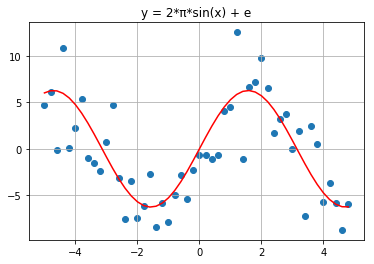

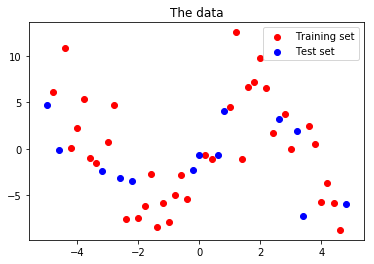

In [5]:
np.random.seed(2)
   
(x1,y1) = corr_vars(sigma=3, func=lambda x: 2*pi*sin(x))   

plt.scatter(x1, y1)        
plt.plot(x1, 2*pi*np.sin(x1), color='r')
plt.title('y = 2*π*sin(x) + e')
plt.grid(True)

# split into training, validation, and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25)

 # show the training and validation sets
plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train, color='red', label='Training set')
plt.scatter(x_test, y_test, color='blue', label='Test set')
plt.title('The data')
plt.legend(loc='best')


In [6]:
def get_rmse( y, y_fit ):
    return np.sqrt( metrics.mean_squared_error( y, y_fit ) )

let's do an example. Say x is a time-sequence scalar. That way, we can picture our sine function and one sample from it as:
These dots represent a single sampled data set. Our job is to use them to guess that true function curve.

So, let's use a smoothed version of the polynomial regression to do exactly that. To stay in line with the above, let's do it on many samples and overlay each prediction curve over the true function.
Then we'll pick a particular x-value (call it x1), and look at the RMSE of predictions. Here, we can point out Bias and Variance.
Let's also do this for varying points within the Bias-Variance trade-off, which can be accomplished by varying the degree of our polynomial regression.
We found that an estimating procedure optimized for Bias is quick to accept the dominant wave-y pattern, but is frequently mislead by noise. An estimating procedure optimized for Variance hesitates to accept such waves, protecting itself from noise, but missing the full extent of that underlying mechanism. Somewhere in the middle is an estimating procedure that will perform best out of sample, consistently.

Notes:
Bias is an expectation calculation done concerning the error distribution. I'm taking the average associated with samples from that distribution. If SS is large, these two will be close. I go with this approach because it's easier to understand. There is a similar minor issue with Variance as well.
You could also make an argument that it speaks to the level of noise in the data set. I see this as the other side of the same coin. If you know the complexity of the true function and have some observed data, you also have an idea of the level of noise.
 
 
# Bias-variance trade-off is a key concept in evaluating the performance of     a machine learning algorithm. 
# An overly simplified model suffers from underfitting (high bias) while a highly complex model suffers 
# from overfitting (high variance). 
# This example illustrates the bias-variance trade-off effect:


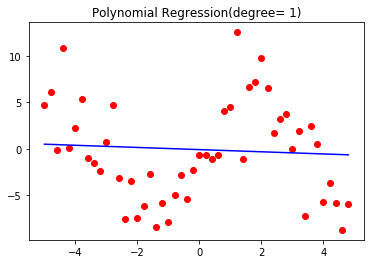

In [7]:
# Training Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 1)
X_poly = poly_reg.fit_transform(x_train.reshape(-1, 1))
poly_reg.fit(X_poly, y_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

# Predict Result with Polynomial Regression

lin_reg.predict(poly_reg.fit_transform(x_test[0].reshape(-1, 1)))




# Visualise the Results of Polynomial Regression with Smoother Curve
X_grid = np.arange(min(x1.reshape(-1, 1)), max(x1.reshape(-1, 1)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x1, y1, color='red')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression(degree= 1)')
plt.show()



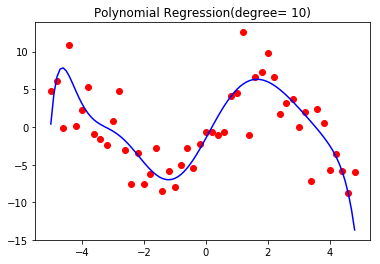

In [8]:
# Training Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(x_train.reshape(-1, 1))
poly_reg.fit(X_poly, y_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

# Predict Result with Polynomial Regression

lin_reg.predict(poly_reg.fit_transform(x_test[0].reshape(-1, 1)))

# Visualise the Results of Polynomial Regression with Smoother Curve
X_grid = np.arange(min(x1.reshape(-1, 1)), max(x1.reshape(-1, 1)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x1, y1, color='red')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression(degree= 10)')
plt.show()



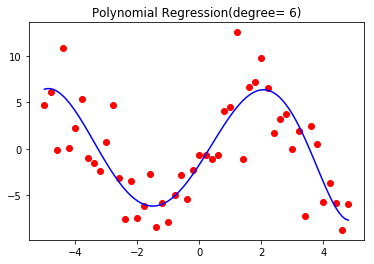

In [9]:
# Training Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 6)
X_poly = poly_reg.fit_transform(x_train.reshape(-1, 1))
poly_reg.fit(X_poly, y_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

# Predict Result with Polynomial Regression

lin_reg.predict(poly_reg.fit_transform(x_test[0].reshape(-1, 1)))

# Visualise the Results of Polynomial Regression with Smoother Curve
X_grid = np.arange(min(x1.reshape(-1, 1)), max(x1.reshape(-1, 1)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x1, y1, color='red')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression(degree= 6)')
plt.show()



We see that the linear (degree = 1) fit is an under-fit:
 1) It does not take into account all the information in the data (high bias), but
 2) It will not change much in the face of a new set of points from the same source (low variance).
 
 The high degree polynomial (degree = 10) fit, on the other hand, is an over-fit:
 1) The curve fits the given data points very well (low bias), but
 2) It will collapse in the face of subsets or new sets of points from the same source because it intimately takes all the data into account, thus losing generality (high variance).
 
The ideal fit, naturally, is one that captures the regularities in the data enough to be reasonably accurate and generalizable to a different set of points from the same source. Unfortunately, in almost every practical setting, it is nearly impossible to do both simultaneously. Therefore, to achieve good performance on data outside the training set, a tradeoff must be made

In [10]:
curve = pd.DataFrame(np.column_stack([x1,y1]),columns=['x','y'])
def fit_poly( degree ):
    p = np.polyfit( curve.x, curve.y, deg = degree )
    curve['fit'] = np.polyval( p, curve.x )
    sn.regplot( curve.x, curve.y, fit_reg = False )
    return plt.plot( curve.x, curve.fit, label='fit' )

In [11]:
rmse_df = pd.DataFrame( columns = ["degree", "rmse_train", "rmse_test"] )

for i in range(0,10,1):
    p = np.polyfit(x_train , y_train, deg = i )
    rmse_df.loc[i-1] = [ i,
                      get_rmse( y_train, np.polyval( p, y_train ) ),
                      get_rmse( x_test, np.polyval( p, x_test ) ) ]

rmse_df

In [12]:
rmse_df

,degree,rmse_train,rmse_test
-1,0.0,5.697390,3.042522
0,1.0,6.362034,3.397493
1,2.0,6.306105,3.525801
2,3.0,111.604944,8.187282
3,4.0,222.221511,7.843358
4,5.0,457.828734,5.895971
5,6.0,1156.075348,5.869112
6,7.0,8114.932321,7.338680
7,8.0,35723.750689,7.592049
8,9.0,113932.653518,6.230087


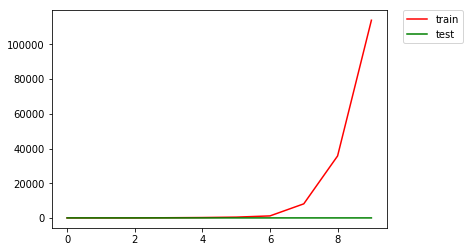

In [13]:
plt.plot( rmse_df.degree,
       rmse_df.rmse_train,
       label='train',
       color = 'r' )

plt.plot( rmse_df.degree,
       rmse_df.rmse_test,
       label='test',
       color = 'g' )

plt.legend(bbox_to_anchor=(1.05, 1),
         loc=2,
         borderaxespad=0.)

E:\laptop softwares\anoconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


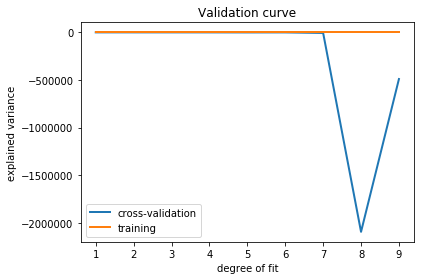

In [14]:
from sklearn.model_selection import validation_curve

degrees = np.arange(1, 10)

model = make_pipeline(PolynomialFeatures(), LinearRegression())

# The parameter to vary is the "degrees" on the pipeline step
# "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                 model, x1[:, np.newaxis], y1,
                 param_name='polynomialfeatures__degree',
                 param_range=degrees)

# Plot the mean train error and validation error across folds
plt.figure(figsize=(6, 4))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2,
         label='cross-validation')
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label='training')

plt.legend(loc='best')
plt.xlabel('degree of fit')
plt.ylabel('explained variance')
plt.title('Validation curve')
plt.tight_layout()